In [1]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import xesmf as xe
import glob

In [3]:
path1 = '/data/disang/WRF/data/MOD/nc/'

filelist = glob.glob(os.path.join(path1,'M*'))

for file in filelist:
    filename = os.path.basename(file)
    nam = filename.split('.h')[0]
    # time = datetime.datetime.strptime(filename.split('d02_')[1],'%Y-%m-%d_%H:%M:%S')
    print(nam)
    
    ##tropomi frequency

    path = '/data/disang/WRF/data/MOD/'
    os.chdir(path)

    ncfiles = []
    for f in os.listdir():
        if f.endswith(('hdf','nc4')):
            ncfiles.append(f)

    ds0 = xr.open_dataset(ncfiles[0])
    # ds0["Deep_Blue_Aerosol_Optical_Depth_550_Land_Best_Estimate"]

    path = '/data/disang/WRF/geomo/or/'
    os.chdir(path)

    ncfiles = []
    for f in os.listdir():
        if f.endswith(('nc','nc4')):
            ncfiles.append(f)

    # Read wrf input file - target grid - 4 km
    ds1 = xr.open_dataset(ncfiles[0])


    # Extract variables that we need from ds1
    EROD = ds1["EROD"]
    Lon = ds1["XLONG_M"]
    Lat = ds1["XLAT_M"]

    aod = ds0["Deep_Blue_Aerosol_Optical_Depth_550_Land_Best_Estimate"]
    Lon0 = ds0["Longitude"]
    Lat0 = ds0["Latitude"]


    # Create new dataset - ds_SAR
    ds_sand = xr.Dataset(
        {

            "AOD": (["x", "y"], aod.data[:,:]),
        },
        coords={
            "lon": (["x", "y"], Lon0[:,:]),
            "lat": (["x", "y"], Lat0[:,:]),
        }
    )

    ds_tar = xr.Dataset(
        {

            "EROD": (["x", "y"], EROD.data[0,0,:,:]),
        },
        coords={
            "lon": (["x", "y"], Lon[0,:,:]),
            "lat": (["x", "y"], Lat[0,:,:]),
        }
    )

    # Calculate regriding weights
    # regridder = xe.Regridder(ds0, ds_sand, 'patch')
    # regridder = xe.Regridder(ds0, ds_sand, 'bilinear')
    # regridder = xe.Regridder(ds_sand, ds_tar, 'nearest_s2d')
    # regridder = xe.Regridder(ds0, ds_EROD, 'nearest_s2d')
    regridder = xe.Regridder(ds_sand, ds_tar, 'bilinear')
    # regridder = xe.Regridder(ds0, ds_EROD, 'nearest_s2d')

    # Regrid EROD
    ds0_r = regridder(ds_sand)

    dt = xr.where(ds0_r["AOD"] == 0, np.nan,ds0_r["AOD"])

    dt.to_netcdf(path1 + nam + ".nc")

In [8]:
### mod04/Data_Fields/Deep_Blue_Aerosol_Optical_Depth_550_Land_Best_Estimate

In [16]:
##tropomi frequency

path = '/data/disang/WRF/data/MOD/'
os.chdir(path)

ncfiles = []
for f in os.listdir():
    if f.endswith(('hdf','nc4')):
        ncfiles.append(f)

ds0 = xr.open_dataset(ncfiles[0])
# ds0["Deep_Blue_Aerosol_Optical_Depth_550_Land_Best_Estimate"]

In [17]:
ds0

<xarray.Dataset>
Dimensions:                                                         (Cell_Across_Swath:mod04: 135, Cell_Across_Swath_500:mod04: 2708, Cell_Along_Swath:mod04: 203, Cell_Along_Swath_500:mod04: 4060, MODIS_Band_AND_NPP_Extra:mod04: 10, MODIS_Band_Ocean:mod04: 7, Num_DeepBlue_Wavelengths:mod04: 3, QA_Byte_Land:mod04: 6, QA_Byte_Ocean:mod04: 5, Solution_2_Land:mod04: 3, Solution_3_Land:mod04: 3, Solution_Index:mod04: 9, Solution_Ocean:mod04: 2)
Dimensions without coordinates: Cell_Across_Swath:mod04, Cell_Across_Swath_500:mod04, Cell_Along_Swath:mod04, Cell_Along_Swath_500:mod04, MODIS_Band_AND_NPP_Extra:mod04, MODIS_Band_Ocean:mod04, Num_DeepBlue_Wavelengths:mod04, QA_Byte_Land:mod04, QA_Byte_Ocean:mod04, Solution_2_Land:mod04, Solution_3_Land:mod04, Solution_Index:mod04, Solution_Ocean:mod04
Data variables:
    Longitude                                                       (Cell_Along_Swath:mod04, Cell_Across_Swath:mod04) float32 ...
    Latitude                                                        (Cell_Along_Swath:mod04, Cell_Across_Swath:mod04) float32 ...
    Scan_Start_Time                                                 (Cell_Along_Swath:mod04, Cell_Across_Swath:mod04) datetime64[ns] ...
    Solar_Zenith                                                    (Cell_Along_Swath:mod04, Cell_Across_Swath:mod04) float32 ...
    Solar_Azimuth                                                   (Cell_Along_Swath:mod04, Cell_Across_Swath:mod04) float32 ...
    Sensor_Zenith                                                   (Cell_Along_Swath:mod04, Cell_Across_Swath:mod04) float32 ...
    Sensor_Azimuth                                                  (Cell_Along_Swath:mod04, Cell_Across_Swath:mod04) float32 ...
    Scattering_Angle                                                (Cell_Along_Swath:mod04, Cell_Across_Swath:mod04) float32 ...
    Land_sea_Flag                                                   (Cell_Along_Swath:mod04, Cell_Across_Swath:mod04) float32 ...
    Aerosol_Cldmask_Land_Ocean                                      (Cell_Along_Swath_500:mod04, Cell_Across_Swath_500:mod04) float32 ...
    Cloud_Pixel_Distance_Land_Ocean                                 (Cell_Along_Swath_500:mod04, Cell_Across_Swath_500:mod04) float32 ...
    Land_Ocean_Quality_Flag                                         (Cell_Along_Swath:mod04, Cell_Across_Swath:mod04) float32 ...
    Optical_Depth_Land_And_Ocean                                    (Cell_Along_Swath:mod04, Cell_Across_Swath:mod04) float32 ...
    Image_Optical_Depth_Land_And_Ocean                              (Cell_Along_Swath:mod04, Cell_Across_Swath:mod04) float32 ...
    Average_Cloud_Pixel_Distance_Land_Ocean                         (Cell_Along_Swath:mod04, Cell_Across_Swath:mod04) float32 ...
    Aerosol_Type_Land                                               (Cell_Along_Swath:mod04, Cell_Across_Swath:mod04) float32 ...
    Fitting_Error_Land                                              (Cell_Along_Swath:mod04, Cell_Across_Swath:mod04) float32 ...
    Surface_Reflectance_Land                                        (Solution_2_Land:mod04, Cell_Along_Swath:mod04, Cell_Across_Swath:mod04) float32 ...
    Corrected_Optical_Depth_Land                                    (Solution_3_Land:mod04, Cell_Along_Swath:mod04, Cell_Across_Swath:mod04) float32 ...
    Corrected_Optical_Depth_Land_wav2p1                             (Cell_Along_Swath:mod04, Cell_Across_Swath:mod04) float32 ...
    Optical_Depth_Ratio_Small_Land                                  (Cell_Along_Swath:mod04, Cell_Across_Swath:mod04) float32 ...
    Number_Pixels_Used_Land                                         (MODIS_Band_AND_NPP_Extra:mod04, Cell_Along_Swath:mod04, Cell_Across_Swath:mod04) float32 ...
    Mean_Reflectance_Land                                           (MODIS_Band_AND_NPP_Extra:mod04, Cell_Along_Swath:mod04, Cell_Across_Swath:mod04) float32 ...
    STD_Reflectance_Land                    

In [18]:
path = '/data/disang/WRF/geomo/or/'
os.chdir(path)

ncfiles = []
for f in os.listdir():
    if f.endswith(('nc','nc4')):
        ncfiles.append(f)
        
# Read wrf input file - target grid - 4 km
ds1 = xr.open_dataset(ncfiles[0])

In [19]:
ds1

<xarray.Dataset>
Dimensions:     (Time: 1, dust_erosion_dimension: 3, land_cat: 21, month: 12, num_urb_params: 132, soil_cat: 16, south_north: 542, south_north_stag: 543, west_east: 669, west_east_stag: 670)
Dimensions without coordinates: Time, dust_erosion_dimension, land_cat, month, num_urb_params, soil_cat, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    Times       (Time) |S19 ...
    XLAT_M      (Time, south_north, west_east) float32 ...
    XLONG_M     (Time, south_north, west_east) float32 ...
    XLAT_V      (Time, south_north_stag, west_east) float32 ...
    XLONG_V     (Time, south_north_stag, west_east) float32 ...
    XLAT_U      (Time, south_north, west_east_stag) float32 ...
    XLONG_U     (Time, south_north, west_east_stag) float32 ...
    CLAT        (Time, south_north, west_east) float32 ...
    CLONG       (Time, south_north, west_east) float32 ...
    MAPFAC_M    (Time, south_north, west_east) float32 ...
    MAPFAC_V    (Time, south_north_stag, west_east) float32 ...
    MAPFAC_U    (Time, south_north, west_east_stag) float32 ...
    MAPFAC_MX   (Time, south_north, west_east) float32 ...
    MAPFAC_VX   (Time, south_north_stag, west_east) float32 ...
    MAPFAC_UX   (Time, south_north, west_east_stag) float32 ...
    MAPFAC_MY   (Time, south_north, west_east) float32 ...
    MAPFAC_VY   (Time, south_north_stag, west_east) float32 ...
    MAPFAC_UY   (Time, south_north, west_east_stag) float32 ...
    E           (Time, south_north, west_east) float32 ...
    F           (Time, south_north, west_east) float32 ...
    SINALPHA    (Time, south_north, west_east) float32 ...
    COSALPHA    (Time, south_north, west_east) float32 ...
    LANDMASK    (Time, south_north, west_east) float32 ...
    XLAT_C      (Time, south_north_stag, west_east_stag) float32 ...
    XLONG_C     (Time, south_north_stag, west_east_stag) float32 ...
    SINALPHA_U  (Time, south_north, west_east_stag) float32 ...
    COSALPHA_U  (Time, south_north, west_east_stag) float32 ...
    SINALPHA_V  (Time, south_north_stag, west_east) float32 ...
    COSALPHA_V  (Time, south_north_stag, west_east) float32 ...
    LANDUSEF    (Time, land_cat, south_north, west_east) float32 ...
    LU_INDEX    (Time, south_north, west_east) float32 ...
    HGT_M       (Time, south_north, west_east) float32 ...
    SOILTEMP    (Time, south_north, west_east) float32 ...
    SOILCTOP    (Time, soil_cat, south_north, west_east) float32 ...
    SCT_DOM     (Time, south_north, west_east) float32 ...
    SOILCBOT    (Time, soil_cat, south_north, west_east) float32 ...
    SCB_DOM     (Time, south_north, west_east) float32 ...
    ALBEDO12M   (Time, month, south_north, west_east) float32 ...
    GREENFRAC   (Time, month, south_north, west_east) float32 ...
    LAI12M      (Time, month, south_north, west_east) float32 ...
    SNOALB      (Time, south_north, west_east) float32 ...
    CON         (Time, south_north, west_east) float32 ...
    VAR         (Time, south_north, west_east) float32 ...
    OA1         (Time, south_north, west_east) float32 ...
    OA2         (Time, south_north, west_east) float32 ...
    OA3         (Time, south_north, west_east) float32 ...
    OA4         (Time, south_north, west_east) float32 ...
    OL1         (Time, south_north, west_east) float32 ...
    OL2         (Time, south_north, west_east) float32 ...
    OL3         (Time, south_north, west_east) float32 ...
    OL4         (Time, south_north, west_east) float32 ...
    EROD        (Time, dust_erosion_dimension, south_north, west_east) float32 ...
    CLAYFRAC    (Time, south_north, west_east) float32 ...
    SANDFRAC    (Time, south_north, west_east) float32 ...
    VAR_SSO     (Time, south_north, west_east) float32 ...
    LAKE_DEPTH  (Time, south_north, west_east) float32 ...
    URB_PARAM   (Time, num_urb_params, south_north, west_east) float32 ...
Attributes:
    TITLE:                           OUTPUT FROM GEOGRID V4.1
    SIMULATION_START_DA

In [34]:
##tropomi frequency

path = '/data/disang/WRF/data/MOD/'
os.chdir(path)

ncfiles = []
for f in os.listdir():
    if f.endswith(('hdf','nc4')):
        ncfiles.append(f)

ds0 = xr.open_dataset(ncfiles[0])
# ds0["Deep_Blue_Aerosol_Optical_Depth_550_Land_Best_Estimate"]

path = '/data/disang/WRF/geomo/or/'
os.chdir(path)

ncfiles = []
for f in os.listdir():
    if f.endswith(('nc','nc4')):
        ncfiles.append(f)
        
# Read wrf input file - target grid - 4 km
ds1 = xr.open_dataset(ncfiles[0])


# Extract variables that we need from ds1
EROD = ds1["EROD"]
Lon = ds1["XLONG_M"]
Lat = ds1["XLAT_M"]

aod = ds0["Deep_Blue_Aerosol_Optical_Depth_550_Land_Best_Estimate"]
Lon0 = ds0["Longitude"]
Lat0 = ds0["Latitude"]


# Create new dataset - ds_SAR
ds_sand = xr.Dataset(
    {

        "AOD": (["x", "y"], aod.data[:,:]),
    },
    coords={
        "lon": (["x", "y"], Lon0[:,:]),
        "lat": (["x", "y"], Lat0[:,:]),
    }
)

ds_tar = xr.Dataset(
    {

        "EROD": (["x", "y"], EROD.data[0,0,:,:]),
    },
    coords={
        "lon": (["x", "y"], Lon[0,:,:]),
        "lat": (["x", "y"], Lat[0,:,:]),
    }
)

# Calculate regriding weights
# regridder = xe.Regridder(ds0, ds_sand, 'patch')
# regridder = xe.Regridder(ds0, ds_sand, 'bilinear')
# regridder = xe.Regridder(ds_sand, ds_tar, 'nearest_s2d')
# regridder = xe.Regridder(ds0, ds_EROD, 'nearest_s2d')
regridder = xe.Regridder(ds_sand, ds_tar, 'bilinear')
# regridder = xe.Regridder(ds0, ds_EROD, 'nearest_s2d')

# Regrid EROD
ds0_r = regridder(ds_sand)

dt = xr.where(ds0_r["AOD"] == 0, np.nan,ds0_r["AOD"])

dt.to_netcdf(path + "lai_nearest.nc")

In [43]:
dt = xr.where(ds0_r["AOD"] == 0, np.nan,ds0_r["AOD"])

In [51]:
dt

'MYD04_L2.A2018147.0945.061.2018150200542'

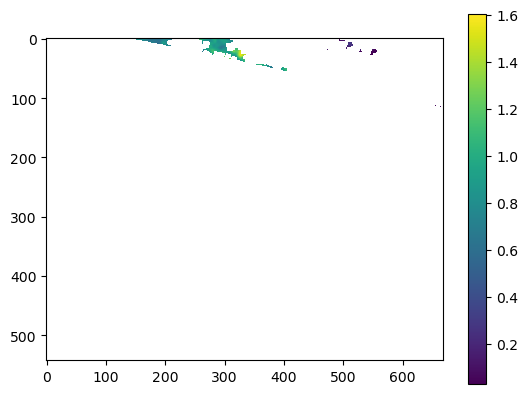

In [46]:
plt.imshow(dt)
plt.colorbar()

In [ ]:
##tropomi frequency

path = '/data/disang/WRF/data/MOD/'
os.chdir(path)

ncfiles = []
for f in os.listdir():
    if f.endswith(('nc','nc4')):
        ncfiles.append(f)
### 0 sandf

ds0 = xr.open_dataset(ncfiles[0])

# # drop time dimension of ds0
# ds0 = ds0.drop_dims('bnds')

path = '/data/disang/WRF/geomo/or/'
os.chdir(path)

ncfiles = []
for f in os.listdir():
    if f.endswith(('nc','nc4')):
        ncfiles.append(f)
        
# Read wrf input file - target grid - 4 km
ds1 = xr.open_dataset(ncfiles[0])
# ds0 = ds0.drop_dims('bnds')

# Extract variables that we need from ds1
EROD = ds1["EROD"]
Lon = ds1["XLONG_M"]
Lat = ds1["XLAT_M"]
# Create new dataset - ds_SAR
ds_EROD = xr.Dataset(
    {
        "EROD": (["x", "y"], EROD[0,0,:,:]),
    },
    coords={
        "lon": (["x", "y"], Lon[0,:,:]),
        "lat": (["x", "y"], Lat[0,:,:]),
    }
)

# Calculate regriding weights
# regridder = xe.Regridder(ds0, ds_sand, 'patch')
# regridder = xe.Regridder(ds0, ds_sand, 'bilinear')
# regridder = xe.Regridder(ds0, ds_sand, 'nearest_s2d')
regridder = xe.Regridder(ds0, ds_EROD, 'nearest_s2d')
# regridder = xe.Regridder(ds0, ds_EROD, 'bilinear')
# regridder = xe.Regridder(ds0, ds_EROD, 'nearest_s2d')

# Regrid EROD
ds0_r = regridder(ds0)

ds0_r.to_netcdf("/data/disang/WRF/geomo/mo/anutro_nearest.nc")

In [ ]:
###lai

path = '/data/disang/WRF/lai/'
os.chdir(path)

ncfiles = []
for f in os.listdir():
    if f.endswith(('nc','nc4')):
        ncfiles.append(f)
ds0 = xr.open_dataset(ncfiles[0])
####crop file

min_lon = 42
min_lat = 33
max_lon = 84
max_lat = 54

mask_lon = (ds0.lon >= min_lon) & (ds0.lon <= max_lon)
mask_lat = (ds0.lat >= min_lat) & (ds0.lat <= max_lat)


cropped_ds = ds0.where(mask_lon & mask_lat, drop=True)

path = '/data/disang/WRF/Build_WRF/WPS/'
os.chdir(path)

ncfiles = []
for f in os.listdir():
    if f.endswith(('nc','nc4')):
        ncfiles.append(f)
        
# Read wrf input file - target grid - 4 km
ds1 = xr.open_dataset(ncfiles[11])
# Extract variables that we need from ds1
EROD = ds1["EROD"]
Lon = ds1["XLONG_M"]
Lat = ds1["XLAT_M"]
# Create new dataset - ds_SAR
ds_sand = xr.Dataset(
    {

        "lai": (["x", "y"], EROD.data[0,0,:,:]),
    },
    coords={
        "lon": (["x", "y"], Lon[0,:,:]),
        "lat": (["x", "y"], Lat[0,:,:]),
    }
)

# Calculate regriding weights
# regridder = xe.Regridder(ds0, ds_sand, 'patch')
# regridder = xe.Regridder(ds0, ds_sand, 'bilinear')
regridder = xe.Regridder(cropped_ds, ds_sand, 'nearest_s2d')
# regridder = xe.Regridder(ds0, ds_EROD, 'nearest_s2d')
# regridder = xe.Regridder(ds0, ds_EROD, 'bilinear')
# regridder = xe.Regridder(ds0, ds_EROD, 'nearest_s2d')

# Regrid EROD
ds0_r = regridder(cropped_ds["LAI"])

ds0_r.to_netcdf("/data/disang/WRF/geomo/mo/lai_nearest.nc")

In [ ]:

path = '/data/disang/WRF/Build_WRF/WPS/'
os.chdir(path)

ncfiles = []
for f in os.listdir():
    if f.endswith(('nc','nc4')):
        ncfiles.append(f)
        
# Read wrf input file - target grid - 4 km
ds1 = xr.open_dataset(ncfiles[11])
# Extract variables that we need from ds1
EROD = ds1["EROD"]
Lon = ds1["XLONG_M"]
Lat = ds1["XLAT_M"]
# Create new dataset - ds_SAR
ds_sand = xr.Dataset(
    {

        "lai": (["x", "y"], EROD.data[0,0,:,:]),
    },
    coords={
        "lon": (["x", "y"], Lon[0,:,:]),
        "lat": (["x", "y"], Lat[0,:,:]),
    }
)

# Calculate regriding weights
# regridder = xe.Regridder(ds0, ds_sand, 'patch')
# regridder = xe.Regridder(ds0, ds_sand, 'bilinear')
regridder = xe.Regridder(cropped_ds, ds_sand, 'nearest_s2d')
# regridder = xe.Regridder(ds0, ds_EROD, 'nearest_s2d')
# regridder = xe.Regridder(ds0, ds_EROD, 'bilinear')
# regridder = xe.Regridder(ds0, ds_EROD, 'nearest_s2d')

# Regrid EROD
ds0_r = regridder(cropped_ds["LAI"])

ds0_r.to_netcdf("/data/disang/WRF/geomo/mo/lai_nearest.nc")